<a href="https://colab.research.google.com/github/CarranzaDritte/INTELIGENCIA_ARTIFICIAL_RN_1889205_IMTC_FIME/blob/master/REDNEURONALCONVOLUCIONAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kaggle Conection

In [ ]:
#Install Kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-07-07 19:18:09           9161  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5616  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2034  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2398  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
! kaggle datasets download -d puneet6060/intel-image-classification

intel-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

# Convolutional Neural Network (CNN)

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import PIL
import PIL.Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential

from os import listdir
from os.path import isfile, join

import cv2
from tqdm.notebook import tqdm
from scipy import ndimage

### Download and prepare the dataset
Modificar este texto 

In [ ]:
path_train = '/content/seg_train/seg_train'
path_build = '/buildings/'
path_forest = '/forest/'
path_glacier = '/glacier/'
path_mountain = '/mountain/'
path_sea = '/sea/'
path_street = '/street/'
path_test = '/content/seg_test/seg_test'

In [ ]:
class_label = ['Building', 'Forest', 'Glacier', 'Mountain', 'Sea', 'Street']

In [ ]:
paths = [path_build, path_forest, path_glacier, path_mountain, path_sea, path_street]
paths

['/buildings/', '/forest/', '/glacier/', '/mountain/', '/sea/', '/street/']

In [ ]:
data = [] #Creacion de una variable del tipo objeto o Array
labels = [] #Creacion de una variable del tipo objeto o Array
IMG_SIZE = 150
augmentation = 10
for i, path in enumerate(paths): #Recorrido del arreglo Paths 
    img_urls = listdir(path_train+path) #Busqueda de un directorio de manera que entra a cierta carpeta para su recorruido etiqueta la carpeta de edificios pór ejemplo con la etiqueta building

    print(f"Importing {class_label[i]}s")
    for img_name in tqdm(img_urls):
        img = cv2.imread(path_train+path+img_name)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        #for u in np.linspace(-5,5,num= augmentation):
        #    im = ndimage.rotate(img, u)
        #    im = cv2.resize(im,(IMG_SIZE,IMG_SIZE))
        im = np.array(img)
        data.append(im)  ## esta linea empuja un dato a la casilla del array Data
        labels.append(i)
        im = np.array(cv2.flip(img,1))
        data.append(im)
        labels.append(i)

Importing Buildings



Importing Forests



Importing Glaciers



Importing Mountains



Importing Seas



Importing Streets


In [ ]:
REFERENCIA AL COMPITA PATO

In [ ]:
data = np.array(data) # Transforma labels en un array 
data.shape

(28068, 150, 150, 3)

In [ ]:
labels = np.array(labels)
labels.shape # Transforma labels en un array 

(28068,)

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


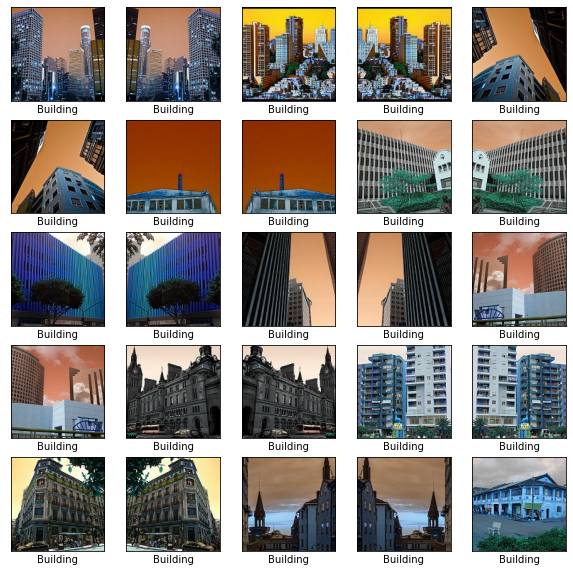

In [ ]:

plt.figure(figsize=(10,10))    
for i in range(25):      
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i]) 
    plt.xlabel(class_label[labels[i]])
plt.show()

### Crear base convolucional




In [ ]:
ini = tf.keras.initializers.RandomNormal(
    mean=0.0, stddev=1e-2, seed=None
)

model = Sequential()
model.add(Conv2D(32,
                 (3,3),
                 activation='relu',
                 kernel_initializer = ini,
                 input_shape=(IMG_SIZE,IMG_SIZE,3)
                )
         )
model.add(Conv2D(32,
                 (3,3),
                 activation='relu',
                 kernel_initializer = ini,
                )
         )
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,
                 (3,3),
                 activation='relu',
                 kernel_initializer = ini,
                )
         )
model.add(Dropout(0.3))

model.add(Conv2D(64,
                 (3,3),
                 activation='relu',
                 kernel_initializer = ini,
                )
         )
model.add(MaxPool2D((2,2)))

model.add(Dense(64,activation='relu'))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(6, activation= 'sigmoid'))


optim = tf.keras.optimizers.Adam(
    learning_rate=5e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-07
)

model.compile(
    optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 71, 71, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 34, 34, 64)       

Here's the complete architecture of your model:

### Compile and train the model




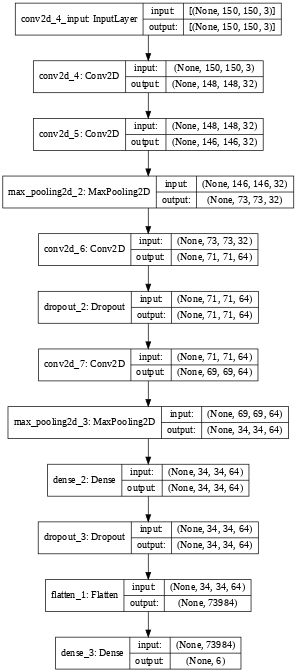

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=50
)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,labels, test_size = 0.2, shuffle= True)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((22454, 150, 150, 3), (22454,), (5614, 150, 150, 3), (5614,))

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, restore_best_weights=True
)


epochs = 10
batch_size = 16

history = model.fit(
    x_train,y_train, batch_size=batch_size, epochs=epochs,
    callbacks=[early_stop], validation_split=0.2, shuffle=True
)

Epoch 1/10
1123/1123 [==============================] - 1863s 2s/step - loss: 1.0376 - accuracy: 0.5926 - val_loss: 0.7892 - val_accuracy: 0.7119
Epoch 2/10
1123/1123 [==============================] - 1842s 2s/step - loss: 0.7352 - accuracy: 0.7315 - val_loss: 0.7167 - val_accuracy: 0.7266
Epoch 3/10
 806/1123 [====================>.........] - ETA: 8:15 - loss: 0.6233 - accuracy: 0.7792

KeyboardInterrupt: ignored

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

##COMENTAME 

### Evaluate the model

In [ ]:
plt.figure(figsize= (10,5))
plt.plot(range(len(history.history['loss'])),history.history['loss'], label= 'Loss')
plt.plot(range(len(history.history['val_loss'])),history.history['val_loss'], label= 'Val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.grid()
plt.show()

NameError: ignored

En este caso tenemos un resultado de el 70% en caso de estar por debajo es necesario volver a entrenar el programa para obtener mejores resultados 

In [ ]:
plt.figure(figsize= (10,5))
plt.plot(range(len(history.history['accuracy'])),history.history['accuracy'], label= 'Accuracy')
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'], label= 'Val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Acuracy vs Epoch')
plt.legend()
plt.grid()
plt.show()

max_ac = np.max(history.history['val_accuracy'])
print(f'Max Accuracy was: {max_ac}')

NameError: ignored